## Exploring Differences in Popularity of Music Genres around the world using Spotify

In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Make a reference to the csv file path
csv_path = "Output/final_spotify_data2.csv"

# Import the csv file as a DataFrame
old_spotify_df = pd.read_csv(csv_path)

# Remove blank rows
new_spotify_df = old_spotify_df.dropna()

In [3]:
# Calculate the length of the DataFrame
rows = len(new_spotify_df)
print(f"There are {rows} rows of data.")

# Calculate the number of unique Countries in the DataFrame
country_count = len(new_spotify_df["Country"].unique())
print(f"This Dataframe houses Spotify streams from {country_count} countries.")

# Calculate the number of unique genres in the DataFrame
genre_count = len(new_spotify_df["Genre"].unique())
print(f"There are {genre_count} genres.")

# Use pandas.to_datetime() to convert Date column to datetime format
new_spotify_df["Date"] = pd.to_datetime(new_spotify_df["Date"])

# Convert "Month" from int to string
new_spotify_df = new_spotify_df.astype({'Month':'string'})

# Calculate the DataFrame's timeframe
first_date = new_spotify_df["Date"].min()
last_date = new_spotify_df["Date"].max()
print(f"The time frame for this data is from {first_date} to {last_date}.")

There are 992335 rows of data.
This Dataframe houses Spotify streams from 17 countries.
There are 505 genres.
The time frame for this data is from 2017-01-01 00:00:00 to 2017-12-31 00:00:00.


#### Summary of prepped data 

* There are 992335 rows of data.
* This Dataframe houses Spotify streams from 17 countries.
* There are 505 genres.
* The time frame for this data is from 2017-01-01 00:00:00 to 2017-12-31 00:00:00.

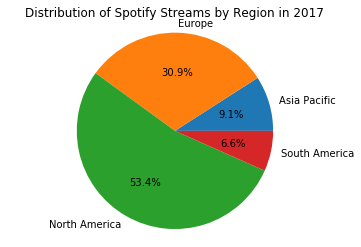

In [4]:
# Create a group based on the 'Region' column 
region_stats = new_spotify_df.groupby('Region').sum()

region_stats['Streams']

# Create a pie chart based upon the total streams per region
region_pie = region_stats['Streams'].plot(kind="pie", y='Streams', 
                                          title=("Distribution of Spotify Streams by Region in 2017"), 
                                          autopct="%1.1f%%", pctdistance=0.6)
region_pie.set_ylabel("")

plt.axis("equal")
plt.savefig("Output/pie_chart.png")
plt.show()

#### Observations from 1st Visualization (Pie Chart)

* Over 50% of streamed music from Spotify in 2017 took place in North America
* One would infer that further analysis into overall genre popularity would be heavily skewed towards North American genres
* We would therefore need to segment the popularity of genres by region and compare each region's popular genres against the overall popular genre

In [5]:
# Confirming data types
new_spotify_df.dtypes

Genre              object
Country            object
Streams             int64
Date       datetime64[ns]
Region             object
Month              string
dtype: object

In [6]:
# Create a group based on the values in the 'Genre' column and sort by Genre
top_genres_overall = new_spotify_df.groupby('Genre').sum().sort_values(by=['Streams'], ascending=False)

# Show the top Genres overall
top_genres_overall.head(5)

,Streams
Genre,
pop rap,4682294687
dance pop,4529603814
trap music,3507748324
tropical house,2959643305
canadian pop,2550806936


**This table lists the top 5 genres streamed across the globe from Spotify in 2017**

In [7]:
# Get top genres in North America
north_america_df = new_spotify_df.loc[new_spotify_df['Region'] == 'North America']
top_genres_NA = north_america_df.groupby('Genre').sum().sort_values(by=['Streams'], ascending=False)
top_genres_NA.head(5)

,Streams
Genre,
pop rap,3896135710
trap music,3166401639
dance pop,2347154865
canadian pop,1850407139
southern hip hop,1515832494


**This table lists the top 5 genres streamed in North America from Spotify in 2017**

In [8]:
# Get top genres in South America
south_america_df = new_spotify_df.loc[new_spotify_df['Region'] == 'South America']
top_genres_SA = south_america_df.groupby('Genre').sum().sort_values(by=['Streams'], ascending=False)
top_genres_SA.head(5)

,Streams
Genre,
reggaeton,1077504819
tropical,517994446
latin,181013460
dance pop,177174327
trap latino,167613663


**This table lists the top 5 genres streamed in South America from Spotify in 2017**

In [9]:
# Get top genres in Asia Pacific
asia_pacific_df = new_spotify_df.loc[new_spotify_df['Region'] == 'Asia Pacific']
top_genres_APAC = asia_pacific_df.groupby('Genre').sum().sort_values(by=['Streams'], ascending=False)
top_genres_APAC.head(5)

,Streams
Genre,
dance pop,579953103
tropical house,490455838
pop,378295074
viral pop,287818855
pop,263691314


**This table lists the top 5 genres streamed in Asia Pacific from Spotify in 2017**

In [10]:
# Get top genres in Europe
europe_df = new_spotify_df.loc[new_spotify_df['Region'] == 'Europe']
top_genres_EU = europe_df.groupby('Genre').sum().sort_values(by=['Streams'], ascending=False)
top_genres_EU.head(5)

,Streams
Genre,
dance pop,1425321519
tropical house,1268098282
deep german hip hop,839579801
french hip hop,775142026
pop,659223795


**This table lists the top 5 genres streamed in Europe from Spotify in 2017**

In [11]:
# Put Regions into a list for for loop (and later for plot labels)
regions = ['North America', 'South America', 'Asia Pacific', 'Europe']

# Create empty list to fill with daily stream data (for plotting)
daily_streams_per_genre_per_country_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for region in regions:
    
    # Locate the rows which contain one region and get the daily stream data
    region_rows = new_spotify_df.loc[new_spotify_df['Region'] == region, 'Streams']
    
    # add subset 
    daily_streams_per_genre_per_country_data.append(region_rows)    
   
    # Determine outliers using upper and lower bounds
    quartiles = region_rows.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f" For {region}: ")
    print(f"The lower quartile of daily stream data is: {lowerq}")
    print(f"The upper quartile of daily stream data is: {upperq}")
    print(f"The interquartile range of daily stream data is: {iqr}")
    print(f"The median of daily stream data is: {quartiles[0.5]}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
#     print(f"Streaming volumes below {lower_bound} could be outliers.") # Cannot have negative streaming volumes
    print(f"Streaming volumes above {upper_bound} could be outliers.")

 For North America: 
The lower quartile of daily stream data is: 2527.0
The upper quartile of daily stream data is: 223578.0
The interquartile range of daily stream data is: 221051.0
The median of daily stream data is: 5605.0
Streaming volumes above 555154.5 could be outliers.
 For South America: 
The lower quartile of daily stream data is: 2818.5
The upper quartile of daily stream data is: 21523.0
The interquartile range of daily stream data is: 18704.5
The median of daily stream data is: 12824.0
Streaming volumes above 49579.75 could be outliers.
 For Asia Pacific: 
The lower quartile of daily stream data is: 4934.0
The upper quartile of daily stream data is: 23922.0
The interquartile range of daily stream data is: 18988.0
The median of daily stream data is: 9553.0
Streaming volumes above 52404.0 could be outliers.
 For Europe: 
The lower quartile of daily stream data is: 10053.0
The upper quartile of daily stream data is: 40556.0
The interquartile range of daily stream data is: 3050

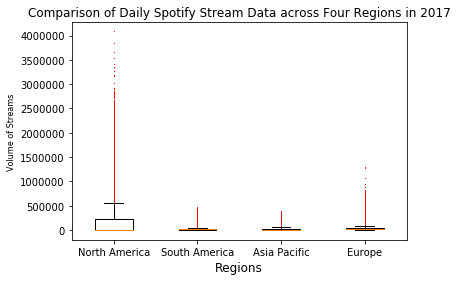

In [12]:
# Generate a box plot of the daily stream volumes per country per genre across the four regions
pixel = dict(markerfacecolor='r', marker=',')
fig1, ax1 = plt.subplots()
ax1.set_title('Comparison of Daily Spotify Stream Data across Four Regions in 2017', fontdict={'fontsize':12})
ax1.set_ylabel('Volume of Streams', fontdict={'fontsize':8})
ax1.boxplot(daily_streams_per_genre_per_country_data, flierprops=pixel)
plt.xticks([1, 2, 3, 4], ['North America', 'South America', 'Asia Pacific', 'Europe'])
plt.xlabel('Regions', fontdict={'fontsize':12})
plt.savefig("Output/box_plot.png")
plt.show()

#### Observations from 2nd Visualization (Box Plots)

* North America has the lowest median (i.e. 5,605) and the widest IQR (i.e. 221,051) of daily Spotify streams across all regions
* In any given day, one genre can be streamed over 500,000 times and still be considered within normal distribution in North America (since streaming volumes below 555,154.5 are not considered outliers) but none of the other regions' normal distribution of daily streamed data extends beyond 90,000 (with Europe being the next highest at 86,310.5)
* The inference here is the sheer volume of streamed data in North America that can be streamed on any given day; but additional implications are that there is a vast distribution of genres that are popularly streamed from Spotify within North America
* There is a much wider variety of genres that are listened to in North America (and also in Europe to an extent) compared to the other regions which appear to have a narrower set of popular genres

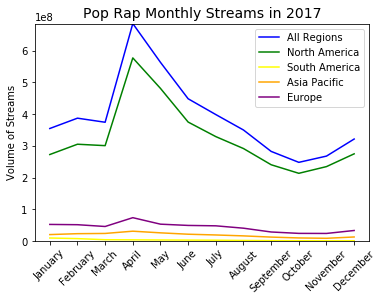

In [13]:
# Filter dataframe to show only the top genre
top_genre_df = new_spotify_df.loc[(new_spotify_df['Genre'] == 'pop rap '), :]


# Group by Month and collect total monthly streams
top_genre = top_genre_df.groupby(['Month']).sum()


# Plot the stream values for top genre overall
x_axis = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
          'September', 'October', 'November', 'December']
y_axis_overall = [top_genre['Streams']['January'], top_genre['Streams']['February'], top_genre['Streams']['March'],
              top_genre['Streams']['April'], top_genre['Streams']['May'], top_genre['Streams']['June'],
              top_genre['Streams']['July'], top_genre['Streams']['August'], top_genre['Streams']['September'],
              top_genre['Streams']['October'], top_genre['Streams']['November'], top_genre['Streams']['December']]

# Filter only North America
north_america_stats = top_genre_df.loc[top_genre_df['Region'] == 'North America']

# Group by Month and collect total monthly streams
top_genre_na = north_america_stats.groupby(['Month']).sum()


# Plot the stream values for North America
y_axis_na = [top_genre_na['Streams']['January'], top_genre_na['Streams']['February'], top_genre_na['Streams']['March'],
              top_genre_na['Streams']['April'], top_genre_na['Streams']['May'], top_genre_na['Streams']['June'],
              top_genre_na['Streams']['July'], top_genre_na['Streams']['August'], top_genre_na['Streams']['September'],
              top_genre_na['Streams']['October'], top_genre_na['Streams']['November'], top_genre_na['Streams']['December']]

# Filter only South America
south_america_stats = top_genre_df.loc[top_genre_df['Region'] == 'South America']

# Group by Month and collect total monthly streams
top_genre_sa = south_america_stats.groupby(['Month']).sum()


# Plot the stream values for South America
y_axis_sa = [top_genre_sa['Streams']['January'], top_genre_sa['Streams']['February'], top_genre_sa['Streams']['March'],
              top_genre_sa['Streams']['April'], top_genre_sa['Streams']['May'], top_genre_sa['Streams']['June'],
              top_genre_sa['Streams']['July'], top_genre_sa['Streams']['August'], top_genre_sa['Streams']['September'],
              top_genre_sa['Streams']['October'], top_genre_sa['Streams']['November'], top_genre_sa['Streams']['December']]

# Filter only Asia Pacific
asia_pacific_stats = top_genre_df.loc[top_genre_df['Region'] == 'Asia Pacific']

# Group by Month and collect total monthly streams
top_genre_apac = asia_pacific_stats.groupby(['Month']).sum()


# Plot the stream values for Asia Pacific
y_axis_apac = [top_genre_apac['Streams']['January'], top_genre_apac['Streams']['February'], top_genre_apac['Streams']['March'],
              top_genre_apac['Streams']['April'], top_genre_apac['Streams']['May'], top_genre_apac['Streams']['June'],
              top_genre_apac['Streams']['July'], top_genre_apac['Streams']['August'], top_genre_apac['Streams']['September'],
              top_genre_apac['Streams']['October'], top_genre_apac['Streams']['November'], top_genre_apac['Streams']['December']]

# Filter only Europe
europe_stats = top_genre_df.loc[top_genre_df['Region'] == 'Europe']

# Group by Month and collect total monthly streams
top_genre_eu = europe_stats.groupby(['Month']).sum()

# Plot the stream values for Europe
y_axis_eu = [top_genre_eu['Streams']['January'], top_genre_eu['Streams']['February'], top_genre_eu['Streams']['March'],
              top_genre_eu['Streams']['April'], top_genre_eu['Streams']['May'], top_genre_eu['Streams']['June'],
              top_genre_eu['Streams']['July'], top_genre_eu['Streams']['August'], top_genre_eu['Streams']['September'],
              top_genre_eu['Streams']['October'], top_genre_eu['Streams']['November'], top_genre_eu['Streams']['December']]

# Plot the total monthly streams of top genre for all regions as a line chart
all_regions, = plt.plot(x_axis, y_axis_overall, color="blue", label="All Regions" )

# Plot the monthly streams for each region as a line chart
north_america, = plt.plot(x_axis, y_axis_na, color="green",label="North America")
south_america, = plt.plot(x_axis, y_axis_sa, color="yellow",label="South America")
asia_pacific, = plt.plot(x_axis, y_axis_apac, color="orange",label="Asia Pacific")
europe, = plt.plot(x_axis, y_axis_eu, color="purple",label="Europe")

# Create a legend for our chart
plt.legend(handles=[all_regions, north_america, south_america, asia_pacific, europe], loc="best")
plt.xticks(rotation=45)
plt.title("Pop Rap Monthly Streams in 2017", fontdict={'fontsize':14})
plt.ylabel('Volume of Streams', fontdict={'fontsize':10})
plt.ylim(0,max(top_genre['Streams']))


# Show the chart
plt.savefig("Output/poprap_line_chart.png")
plt.show()

#### Observations from 3rd Visualization (Multiple Line Plots for Top Genre - Pop Rap)

* Pop rap was Spotify's top genre in 2017. It was extremely popular in North America but not as popular in other regions
* April was pop rap's highest streaming month, largely due to a significant spike in North American streaming
* Was April the launch month of a popular albumn from a top pop rap artist? We would need to do a further deep dive into April 2017 to better understand the spike in pop rap

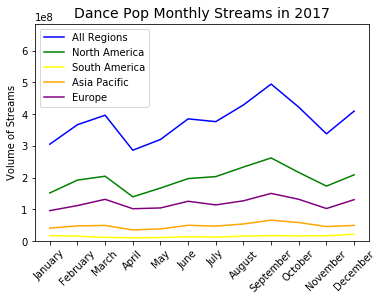

In [14]:
# Filter dataframe to show only the second top genre
top_genre2_df = new_spotify_df.loc[(new_spotify_df['Genre'] == 'dance pop '), :]


# Group by Month and collect total monthly streams
top_genre2 = top_genre2_df.groupby(['Month']).sum()


# Plot the stream values for second top genre overall
x_axis2 = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
          'September', 'October', 'November', 'December']
y_axis2_overall = [top_genre2['Streams']['January'], top_genre2['Streams']['February'], top_genre2['Streams']['March'],
              top_genre2['Streams']['April'], top_genre2['Streams']['May'], top_genre2['Streams']['June'],
              top_genre2['Streams']['July'], top_genre2['Streams']['August'], top_genre2['Streams']['September'],
              top_genre2['Streams']['October'], top_genre2['Streams']['November'], top_genre2['Streams']['December']]

# Filter only North America
north_america_stats2 = top_genre2_df.loc[top_genre2_df['Region'] == 'North America']

# Group by Month and collect total monthly streams
top_genre2_na = north_america_stats2.groupby(['Month']).sum()


# Plot the stream values for North America
y_axis2_na = [top_genre2_na['Streams']['January'], top_genre2_na['Streams']['February'], top_genre2_na['Streams']['March'],
              top_genre2_na['Streams']['April'], top_genre2_na['Streams']['May'], top_genre2_na['Streams']['June'],
              top_genre2_na['Streams']['July'], top_genre2_na['Streams']['August'], top_genre2_na['Streams']['September'],
              top_genre2_na['Streams']['October'], top_genre2_na['Streams']['November'], top_genre2_na['Streams']['December']]

# Filter only South America
south_america_stats2 = top_genre2_df.loc[top_genre2_df['Region'] == 'South America']

# Group by Month and collect total monthly streams
top_genre2_sa = south_america_stats2.groupby(['Month']).sum()


# Plot the stream values for South America
y_axis2_sa = [top_genre2_sa['Streams']['January'], top_genre2_sa['Streams']['February'], top_genre2_sa['Streams']['March'],
              top_genre2_sa['Streams']['April'], top_genre2_sa['Streams']['May'], top_genre2_sa['Streams']['June'],
              top_genre2_sa['Streams']['July'], top_genre2_sa['Streams']['August'], top_genre2_sa['Streams']['September'],
              top_genre2_sa['Streams']['October'], top_genre2_sa['Streams']['November'], top_genre2_sa['Streams']['December']]

# Filter only Asia Pacific
asia_pacific_stats2 = top_genre2_df.loc[top_genre2_df['Region'] == 'Asia Pacific']

# Group by Month and collect total monthly streams
top_genre2_apac = asia_pacific_stats2.groupby(['Month']).sum()


# Plot the stream values for Asia Pacific
y_axis2_apac = [top_genre2_apac['Streams']['January'], top_genre2_apac['Streams']['February'], top_genre2_apac['Streams']['March'],
              top_genre2_apac['Streams']['April'], top_genre2_apac['Streams']['May'], top_genre2_apac['Streams']['June'],
              top_genre2_apac['Streams']['July'], top_genre2_apac['Streams']['August'], top_genre2_apac['Streams']['September'],
              top_genre2_apac['Streams']['October'], top_genre2_apac['Streams']['November'], top_genre2_apac['Streams']['December']]

# Filter only Europe
europe_stats2 = top_genre2_df.loc[top_genre2_df['Region'] == 'Europe']

# Group by Month and collect total monthly streams
top_genre2_eu = europe_stats2.groupby(['Month']).sum()

# Plot the stream values for Europe
y_axis2_eu = [top_genre2_eu['Streams']['January'], top_genre2_eu['Streams']['February'], top_genre2_eu['Streams']['March'],
              top_genre2_eu['Streams']['April'], top_genre2_eu['Streams']['May'], top_genre2_eu['Streams']['June'],
              top_genre2_eu['Streams']['July'], top_genre2_eu['Streams']['August'], top_genre2_eu['Streams']['September'],
              top_genre2_eu['Streams']['October'], top_genre2_eu['Streams']['November'], top_genre2_eu['Streams']['December']]

# Plot the total monthly streams of top genre for all regions as a line chart
all_regions2, = plt.plot(x_axis2, y_axis2_overall, color="blue", label="All Regions" )

# Plot the monthly streams for each region as a line chart
north_america2, = plt.plot(x_axis2, y_axis2_na, color="green",label="North America")
south_america2, = plt.plot(x_axis2, y_axis2_sa, color="yellow",label="South America")
asia_pacific2, = plt.plot(x_axis2, y_axis2_apac, color="orange",label="Asia Pacific")
europe2, = plt.plot(x_axis2, y_axis2_eu, color="purple",label="Europe")

# Create a legend for our chart
plt.legend(handles=[all_regions2, north_america2, south_america2, asia_pacific2, europe2], loc="best")
plt.xticks(rotation=45)
plt.title("Dance Pop Monthly Streams in 2017", fontdict={'fontsize':14})
plt.ylabel('Volume of Streams', fontdict={'fontsize':10})
plt.ylim(0,max(top_genre['Streams']))


# Show the chart
plt.savefig("Output/dancepop_line_chart.png")
plt.show()

#### Observations from 4th Visualization (Multiple Line Plots for 2nd Top Genre - Dance Pop)

* Dance Pop was Spotify's second top genre in 2017. It was almost as equally popular in North America as it was in other regions and therefore its popularity was not as heavily skewed towards North American audiences as compared to Pop Rap
* Dance Pop appears to show some seasonality in terms of its popularity. Certain months show spikes in streaming, for instance March and September
* Could some seasons (e.g. start of Spring and end of Summer) be specifically targetted by Dance Pop artists as the optimal seasons to launch new Dance Pop albums? Do these spikes appear in live concerts as well? We would need to run further analyses with more detailed data to understand the cause for these seasonal spikes.

### Null hypothesis: No statistical significance exists in the distribution of genres among the Four global regions.

In [15]:
# The statistical module used to run chi square test
import scipy.stats as stats

In [16]:
# Observed data of count of unique genres distributed across Four global regions 
# The series was calculated from the top genre by region tables earlier. Each table has the distinct count of genres per region 
observed = pd.Series([180, 127, 248, 380], index=["North America", "South America", "Asia Pacific", "Europe"])

# Create a data frame
df = pd.DataFrame([observed]).T

# Add a column whose default values are the expected values; total distinct genres = 505; divide by 4 regions = 126.25
df[1] = 126.25

# Rename the columns
df.columns = ["observed", "expected"]

# View the data frame
df

,observed,expected
North America,180,126.25
South America,127,126.25
Asia Pacific,248,126.25
Europe,380,126.25


In [17]:
# With four regions, the degree of freedom is 4-1 = 3
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 3)

In [18]:
# The critical value
critical_value

7.814727903251179

In [19]:
# Run the chi square test with stats.chisquare()
stats.chisquare(df['observed'], df['expected'])

Power_divergenceResult(statistic=650.310891089109, pvalue=1.2472430905907916e-140)

### Conclusion
**Since the chi-square value of 650.3 at a confidence level of 95% exceeds the critical value of 7.8, we conclude that the differences seen in the number of genres per region are statistically significant.**